In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import chi2_contingency
from scipy import stats
from matplotlib import pyplot as plt
import json
import yapf.yapflib.yapf_api
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")

1 Read the dataset 
========

In [3]:
data = pd.read_csv("../../Dataset/sep19SexAndAgeAddedFINAL DATASET_ver2.txt", sep=",")

In [7]:
# add Class to the dataset
_class = []
for i in range(data.shape[0]):
    if((data.L102900[i] <= 200) & (data.L103200[i] <= 130) & (data.L103000[i] <=150)):
        _class.append(0)
    else:
        _class.append(1)
data["CLASS"] = _class

In [8]:
# filter the data set
data = data[data.FIELD_16 != 1]  # exclude people who are diagnosed for (diabetes)
data = data[data.FIELD_23 != 1]  # exclude people who are on medication for diabetes

data = data[
    data.FIELD_15 != 1
]  # exclude people who are diagnosed for (high blood pressure)
data = data[
    data.FIELD_22 != 1
]  # exclude people who are on medication for high blood pressure

data = data[data.FIELD_17 != 1]  # exclude people who are diagnosed for hyperlipidemia
data = data[
    data.FIELD_24 != 1
]  # exclude people who are on medication for hyperlipidemia

data = data[data.FIELD_13 != 1]  
data = data[data.FIELD_20 != 1]  

print(data.shape)

(465879, 406)


In [9]:
# rename columns
data.rename(
    columns={
        "L104600": "HBA1C",
        "L103000": "Triglycerides",
        "L100800": "fasting glucose",
        "S000300": "BMI",
        "S000501": "SBP",
        "S000502": "DBP",
        "L101700": "r-GTP gamma",
        "L103300": "Cardiac risk factor",
        "L190400": "Hemoglobin",
        "L190500": "HCT",
        "L100700": "Uric Acid",
        "L101300": "SGPT",
        "L190300": "RBC",
        "L102900": "total cholesterol",
        "L103100": "HDL-Cholesterol",
    },
    inplace=True,
)

3.4 Final Selected Features
======

In [11]:
finalFeatures = ['AGE', 'BMI', 'Uric Acid', 'fasting glucose','L100100','SBP','DBP','L100200','SGPT', 
                 'L190000','L100400','r-GTP gamma', 'RBC', 'HCT','Hemoglobin', 'L101600', 'L105200', 
                 'CLASS'
]

Classifier Model Test Based on the features 
========

In [12]:
randomseed = 7
mydata = data[finalFeatures].copy().dropna()
print(mydata.shape)
mydata.head()

(425698, 18)


,AGE,BMI,Uric Acid,fasting glucose,L100100,SBP,DBP,L100200,SGPT,L190000,L100400,r-GTP gamma,RBC,HCT,Hemoglobin,L101600,L105200,CLASS
2,48.0,24.3,2.6,113.0,6.7,132.0,85.0,4.3,15.0,4.08,16.5,36.0,4.24,40.7,13.4,42.0,75.0,0
3,49.0,24.3,2.0,105.0,6.9,140.0,80.0,4.5,15.0,5.19,11.4,39.0,4.28,41.1,13.8,53.0,84.0,0
4,50.0,23.7,2.8,118.0,7.0,145.0,90.0,4.6,12.0,3.44,12.6,24.0,4.34,40.4,13.7,49.0,84.0,1
5,46.0,22.9,4.2,93.0,7.3,123.0,84.0,4.2,21.0,7.23,14.2,22.0,4.30,33.6,10.4,48.0,71.0,0
6,49.0,21.2,5.1,87.0,6.5,112.0,68.0,4.5,32.0,3.59,15.4,36.0,4.72,44.9,15.1,93.0,75.0,1


In [13]:
mydata.columns

Index(['AGE', 'BMI', 'Uric Acid', 'fasting glucose', 'L100100', 'SBP', 'DBP',
       'L100200', 'SGPT', 'L190000', 'L100400', 'r-GTP gamma', 'RBC', 'HCT',
       'Hemoglobin', 'L101600', 'L105200', 'CLASS'],
      dtype='object')

In [14]:
class1 = mydata[mydata.CLASS == 1]
class0 = mydata[mydata.CLASS == 0]

print(class1.shape[0],class0.shape[0],)

class1_test = class1.sample(10000, random_state=randomseed)
class0_test = class0.sample(10000, random_state=randomseed)
test = pd.concat([class1_test, class0_test])
test=shuffle(test)


class1_train = class1.drop(class1_test.index) #.sample( class2_train.shape[0], random_state=randomseed)
class0_train = class0.drop(class0_test.index) #.sample( class2_train.shape[0], random_state=randomseed)
train = pd.concat([class1_train, class0_train])
train=shuffle(train)

219435 206263


In [15]:
# train.to_csv('train.txt',sep=',')
# test.to_csv('test.txt',sep=',')

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train.iloc[:, :-1]=scaler.fit_transform(train.iloc[:, :-1])
test.iloc[:, :-1]=scaler.transform(test.iloc[:, :-1])

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=randomseed, n_estimators=100, max_depth=10)
rf.fit(train.iloc[:, :-1], train.iloc[:, -1])

RandomForestClassifier(max_depth=10, random_state=7)

0.6996


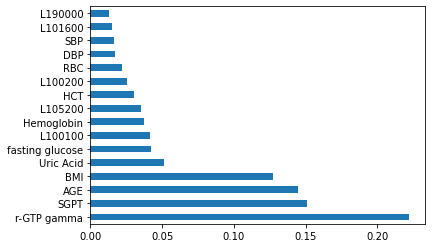

Index(['r-GTP gamma', 'SGPT', 'AGE', 'BMI', 'Uric Acid', 'fasting glucose',
       'L100100', 'Hemoglobin', 'L105200', 'HCT', 'L100200', 'RBC', 'DBP',
       'SBP', 'L101600', 'L190000'],
      dtype='object')
r-GTP gamma        0.222167
SGPT               0.150883
AGE                0.144936
BMI                0.127424
Uric Acid          0.051572
fasting glucose    0.042151
L100100            0.041496
Hemoglobin         0.037060
L105200            0.035395
HCT                0.030620
L100200            0.025680
RBC                0.022006
DBP                0.017355
SBP                0.016636
L101600            0.014808
L190000            0.012784
dtype: float64
0.9929720901429192


In [18]:
ypred = rf.predict(test.iloc[:, :-1])

score = rf.score(test.iloc[:, :-1], test.iloc[:, -1])
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=test.iloc[:, :-1].columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)
print(feat_importances.nlargest(16))

print(np.sum(feat_importances.nlargest(16)))

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test.iloc[:, -1], ypred)

array([[6725, 3275],
       [2733, 7267]], dtype=int64)

In [21]:
print(
    "Accuracy on training set: {:.3f}".format(
        rf.score(train.iloc[:, :-1], train.iloc[:, -1])
    )
)
print(
    "Accuracy on test set: {:.3f}".format(rf.score(test.iloc[:, :-1], test.iloc[:, -1]))
)
ypred = rf.predict(test.iloc[:, :-1])

confmatrx = pd.DataFrame(confusion_matrix(test.iloc[:, -1], ypred))
confmatrx.head()

Accuracy on training set: 0.713
Accuracy on test set: 0.700


,0,1
0,6725,3275
1,2733,7267


In [22]:
from sklearn.metrics import classification_report

print(classification_report(test.iloc[:, -1], ypred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69     10000
           1       0.69      0.73      0.71     10000

    accuracy                           0.70     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.70      0.70      0.70     20000



In [28]:
import xgboost as xgb
from sklearn import metrics as m

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

xgb_model.fit(train.iloc[:, :-1], train.iloc[:, -1])

y_pred = xgb_model.predict((test.iloc[:, :-1]))

print(
    "Accuracy on training set: {:.3f}".format(
        xgb_model.score(train.iloc[:, :-1], train.iloc[:, -1])
    )
)
print(
    "Accuracy on test set: {:.3f}".format(xgb_model.score(test.iloc[:, :-1], test.iloc[:, -1]))
)
confmatrx = pd.DataFrame(confusion_matrix(test.iloc[:, -1], y_pred))
confmatrx.head()

Accuracy on training set: 0.699
Accuracy on test set: 0.703


,0,1
0,6981,3019
1,2915,7085


In [29]:
print(classification_report(test.iloc[:, -1], y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70     10000
           1       0.70      0.71      0.70     10000

    accuracy                           0.70     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.70      0.70      0.70     20000



===============================
==========

In [34]:
# import pickle

# with open('HyperlipidemiaClassifierModel', 'wb') as f:
#     pickle.dump(rf, f)